In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt

np.random.seed(1)

In [3]:
n = 300

In [4]:
X = np.random.uniform(size=(1, n))
V = np.random.uniform(low=(-1/10), high=(1/10), size=(1, n))

In [5]:
X.shape, V.shape

((1, 300), (1, 300))

In [6]:
D = np.sin(20*X) + 3*X + V

In [7]:
D.shape

(1, 300)

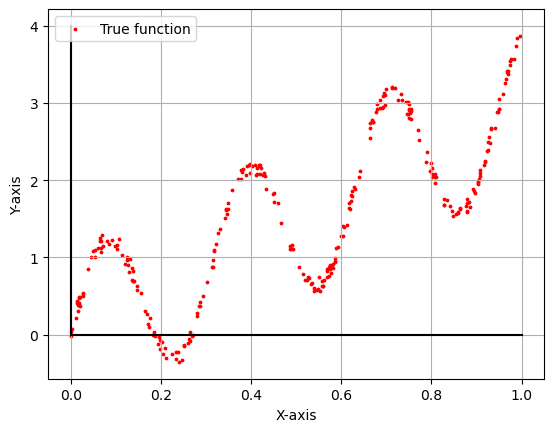

In [8]:
plt.scatter(X[0,:], D[0,:], color='r', label='True function', s=3)

plt.plot([0,0], [0,4], color='black', linestyle='-')
plt.plot([0,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/dataset.png', dpi=400, bbox_inches="tight", transparent=True)

In [9]:
N = 24

In [10]:
phi2 = lambda x: x

In [11]:
phi1 = lambda x: np.tanh(x)

In [12]:
phi1_der = lambda x: 1 - np.tanh(x)**2

In [13]:
partial_on_1 = lambda x, W: W[:2*N:2] * x + W[1:2*N:2]

In [14]:
f = lambda x, W: phi2(W[2*N:-1].T @ phi1(partial_on_1(x, W)) + W[-1])

In [15]:
number_of_epochs = 50000
eta = 0.1
eps = 0.01
scale_factor = 0.99

W = np.random.rand(3*N+1,1)
Y = np.empty(D.shape)

history = list()
for epoch in range(number_of_epochs):
    for i, x in enumerate(X[0]):
        y = f(x, W)
        d = D[0,i]
        Y[0,i] = y[0,0]
        t = partial_on_1(x, W)
        
        grad_W          = np.empty(W.shape)
        grad_W[:2*N:2]  = - (x)       * (np.multiply(phi1_der(t), W[2*N:-1]) * (d - y))
        grad_W[1:2*N:2] = - (1)       * (np.multiply(phi1_der(t), W[2*N:-1]) * (d - y))
        grad_W[2*N:-1]  = - (phi1(t)) * ((d - y))
        grad_W[-1]      = - (1)       * ((d - y))

        W = W - eta * grad_W
        
    history.append(np.mean((D[0] - Y)**2, axis=1))
    if history[-1] < eps:
        print(f'Final epoch: {epoch}')
        break
    elif epoch > 0 and history[-1] > history[-2]:
        eta *= scale_factor

Final epoch: 35354


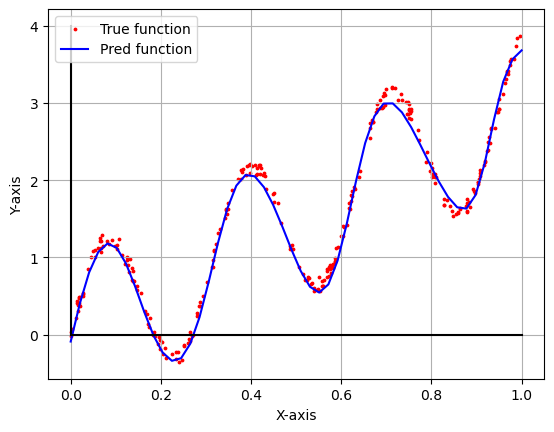

In [16]:
plt.scatter(X[0,:], D[0,:], color='r', label='True function', s=3)

X_hat = np.linspace(0, 1)
Y = np.array([f(x, W)[0,0] for x in X_hat])
plt.plot(X_hat, Y, color='b', label='Pred function')

plt.plot([0,0], [0,4], color='black', linestyle='-')
plt.plot([0,1], [0,0], color='black', linestyle='-')
plt.legend(loc="upper left")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.savefig('plot/output.png', dpi=400, bbox_inches="tight", transparent=True)

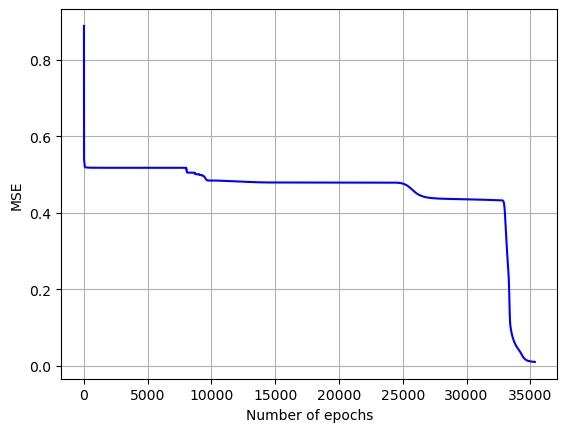

In [17]:
plt.plot(history, color='b')

plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.grid()
plt.savefig('plot/history.png', dpi=400, bbox_inches="tight", transparent=True)